In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.html.use_mathjax = False #disables latex
import unicodedata

In [2]:
analyst = pd.read_csv(r'C:\Users\taewoo\Desktop\Datasets\DataAnalyst.csv')
analyst.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [3]:
analyst.drop(columns='Unnamed: 0', inplace=True)
analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 264.1+ KB


## Data Cleaning

### Dealing with missing/NaN values

It seems like NaN values are denoted as -1.

For this exericse, I plan to investigate nan values in columns one by one on purpose to fully understand situational replacements.

In [4]:
analyst.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [5]:
analyst.loc[analyst['Company Name'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
1860,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",-1.0,NaN,"Mooresville, NC",-1,-1,-1,-1,-1,-1,-1,-1,-1


I was right, -1 indicates NaN values

Row 1860 is missing too many values, so I'm dropping it

In [6]:
analyst.drop(1860, inplace= True)
analyst.reset_index(drop=True, inplace=True)

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

for col in analyst.columns:
    print(f"{col}: {(analyst[col]==-1).sum() + (analyst[col]=='-1').sum()}")

Job Title: 0
Salary Estimate: 1
Job Description: 0
Rating: 271
Company Name: 0
Location: 0
Headquarters: 171
Size: 162
Founded: 659
Type of ownership: 162
Industry: 352
Sector: 352
Revenue: 162
Competitors: 1731
Easy Apply: 2172


##### Salary Estimate Column

In [8]:
analyst.loc[analyst['Salary Estimate'] == "-1"]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2148,Configuration/Data Management Analyst III,-1,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1,-1


In [9]:
analyst.loc[analyst['Headquarters'] == "Bellevue, WA"]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
1020,Marketing Data Analyst,$46K-$102K (Glassdoor est.),Overview\n\n\nAs a key member of the Analytics...,3.5,Efinancial\n3.5,"Tempe, AZ","Bellevue, WA",201 to 500 employees,2001,Company - Private,Insurance Agencies & Brokerages,Insurance,$50 to $100 million (USD),-1,-1
2112,"Data Analyst II, QA",$35K-$67K (Glassdoor est.),We are looking for someone that is highly moti...,4.2,"iSpot.tv, Inc.\n4.2","Bellevue, WA","Bellevue, WA",51 to 200 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1
2122,Engines Configuration and Data Management Analyst,$55K-$101K (Glassdoor est.),Job Description\nPosition Title: Engines Confi...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1,-1
2136,Configuration/Data Management Analyst,$55K-$101K (Glassdoor est.),Job Description\nExciting space exploration en...,4.2,NuWest Group\n4.2,"Kent, WA","Bellevue, WA",51 to 200 employees,1990,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1,-1
2145,Configuration and Data Management Analyst,$55K-$101K (Glassdoor est.),Job Qualifications:BA/BS in a related technica...,4.4,Protingent Staffing\n4.4,"Renton, WA","Bellevue, WA",51 to 200 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1,-1
2148,Configuration/Data Management Analyst III,-1,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1,-1


In [10]:
analyst_3 = [i for i, job in enumerate(analyst['Job Title']) if 'Analyst III' in job]
analyst.iloc[analyst_3]['Salary Estimate'].value_counts()[:5]

$35K-$42K (Glassdoor est.)     6
$47K-$76K (Glassdoor est.)     4
$60K-$124K (Glassdoor est.)    3
$46K-$86K (Glassdoor est.)     2
$98K-$114K (Glassdoor est.)    2
Name: Salary Estimate, dtype: int64

In [11]:
# I think 55𝐾− 101K range is reasonable given the job's location
analyst.at[2148, 'Salary Estimate'] = '55𝐾− 101K (Glassdoor est.)'

##### Rating Column

In [12]:
nan_rating_ind = analyst.loc[analyst['Rating'] == -1].index
# np.nan is a float, so it fulfills the adequacy
analyst.at[nan_rating_ind, 'Rating'] = np.nan
print('-1 value count: {}'.format((analyst['Rating'] == -1).sum()))
print('NaN value count: {}'.format((analyst['Rating'].isnull()).sum()))

-1 value count: 0
NaN value count: 271


##### Headquarters

In [13]:
nan_head_ind = analyst.loc[analyst['Headquarters'] == '-1'].index
analyst.at[nan_head_ind, 'Headquarters'] = 'Unknown'
print('-1 value count: {}'.format((analyst['Headquarters'] == '-1').sum()))
print('NaN value count: {}'.format((analyst['Headquarters'].isnull()).sum()))

-1 value count: 0
NaN value count: 0


##### Size

In [14]:
print(f'Unique values of the size column \n{analyst["Size"].unique()}')
print('-1 value count: {}'.format((analyst['Size'] == '-1').sum()))
print('NaN value count: {}'.format((analyst['Size'].isnull()).sum()))
# 'Unknown already exists'
for i, size in enumerate(analyst['Size']):
    if 'to' in size:
        analyst.at[i ,'Size'] = size.replace('employees', '').strip()
    elif '+' in size:
         analyst.at[i ,'Size'] = size.split()[0]
    else:
         analyst.at[i ,'Size'] = 'Unknown'

print('========')
print(f'Unique values of the size column \n{analyst["Size"].unique()}')
print('-1 value count: {}'.format((analyst['Size'] == '-1').sum()))
print('NaN value count: {}'.format((analyst['Size'].isnull()).sum()))

Unique values of the size column 
['201 to 500 employees' '10000+ employees' '1001 to 5000 employees'
 '501 to 1000 employees' '5001 to 10000 employees' '1 to 50 employees'
 '51 to 200 employees' 'Unknown' '-1']
-1 value count: 162
NaN value count: 0
Unique values of the size column 
['201 to 500' '10000+' '1001 to 5000' '501 to 1000' '5001 to 10000'
 '1 to 50' '51 to 200' 'Unknown']
-1 value count: 0
NaN value count: 0


##### Founded Column

In [15]:
nan_founded_ind = analyst.loc[analyst['Founded'] == -1].index
# adding np.nan changes the dtype of the column from int to float
analyst.at[nan_founded_ind, 'Founded'] = np.nan
analyst['Founded'] = analyst['Founded'].astype('Int64')

print(analyst['Founded'].unique())
print('-1 value count: {}'.format((analyst['Founded'] == -1).sum()))
print('NaN value count: {}'.format((analyst['Founded'].isnull()).sum()))

<IntegerArray>
[1961, 1893, 2003, 2002, 2009, 2014, 2001, 1914, 1896, 2013,
 ...
 1924, 1907, 1682, 1875, 1917, 1876, 1785, 1909, 1789, 1930]
Length: 161, dtype: Int64
-1 value count: 0
NaN value count: 659


##### Type of ownership Column

In [16]:
print(analyst['Type of ownership'].unique())

nan_ownership_ind = analyst.loc[analyst['Type of ownership'] == '-1'].index
analyst.at[nan_ownership_ind, 'Type of ownership'] = 'Unknown'

print(analyst['Type of ownership'].unique())

['Nonprofit Organization' 'Company - Private'
 'Subsidiary or Business Segment' 'Company - Public' 'Hospital' 'Unknown'
 'Contract' '-1' 'Government' 'School / School District'
 'Other Organization' 'College / University' 'Self-employed'
 'Private Practice / Firm' 'Franchise']
['Nonprofit Organization' 'Company - Private'
 'Subsidiary or Business Segment' 'Company - Public' 'Hospital' 'Unknown'
 'Contract' 'Government' 'School / School District' 'Other Organization'
 'College / University' 'Self-employed' 'Private Practice / Firm'
 'Franchise']


##### Industry & Sector Column

In [17]:
# when missing industry, sector is also unknown
nan_industry_ind = analyst.loc[analyst['Industry'] == '-1'].index
analyst.at[nan_industry_ind, ['Industry', 'Sector']] = 'Unknown'

print('Industry')
print('-1 value count: {}'.format((analyst['Industry'] == '-1').sum()))
print('NaN value count: {}'.format((analyst['Industry'].isnull()).sum()))

print('Sector')
print('-1 value count: {}'.format((analyst['Sector'] == '-1').sum()))
print('NaN value count: {}'.format((analyst['Sector'].isnull()).sum()))

Industry
-1 value count: 0
NaN value count: 0
Sector
-1 value count: 0
NaN value count: 0


##### Revenue Column

In [18]:
print(analyst['Revenue'].unique())
nan_revenue_ind = analyst.loc[(analyst['Revenue'] == '-1') | (analyst['Revenue'] == 'Unknown / Non-Applicable')].index
analyst.at[nan_revenue_ind, 'Revenue'] = 'Unknown'

print(analyst['Revenue'].unique())

['$100 to $500 million (USD)' '$2 to $5 billion (USD)'
 'Unknown / Non-Applicable' '$50 to $100 million (USD)'
 '$1 to $2 billion (USD)' '$5 to $10 billion (USD)'
 '$1 to $5 million (USD)' '$25 to $50 million (USD)' '$10+ billion (USD)'
 'Less than $1 million (USD)' '$10 to $25 million (USD)' '-1'
 '$500 million to $1 billion (USD)' '$5 to $10 million (USD)']
['$100 to $500 million (USD)' '$2 to $5 billion (USD)' 'Unknown'
 '$50 to $100 million (USD)' '$1 to $2 billion (USD)'
 '$5 to $10 billion (USD)' '$1 to $5 million (USD)'
 '$25 to $50 million (USD)' '$10+ billion (USD)'
 'Less than $1 million (USD)' '$10 to $25 million (USD)'
 '$500 million to $1 billion (USD)' '$5 to $10 million (USD)']


##### Competitors Column

In [19]:
nan_comp_ind = analyst.loc[analyst['Competitors'] == '-1'].index
analyst.at[nan_comp_ind, 'Competitors'] = 'Unknown'

print('-1 value count: {}'.format((analyst['Competitors'] == '-1').sum()))
print('NaN value count: {}'.format((analyst['Competitors'].isnull()).sum()))

-1 value count: 0
NaN value count: 0


##### Easy Apply Column

In [20]:
print(analyst['Easy Apply'].unique())

for i, item in enumerate(analyst['Easy Apply']):
    if item == '-1':
        analyst.at[i, 'Easy Apply'] = False
    else:
        analyst.at[i, 'Easy Apply'] = True

print(analyst['Easy Apply'].unique())

['True' '-1']
[True False]


Dealing with NaN values is done

### Cleaning & Transforming Values

In [21]:
analyst.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),Unknown,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Unknown,False
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000,2003,Company - Private,Internet,Information Technology,Unknown,GoDaddy,False
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),Unknown,False
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [22]:
# get rid of (Glassdoor est.)
analyst['Salary Estimate'] = [x.split('(')[0] for x in analyst['Salary Estimate']]
# replace '\n' with space
analyst['Job Description'] = [x.replace('\n', ' ') for x in analyst['Job Description']]
# select the company name only 
analyst['Company Name'] = [x.split('\n')[0] for x in analyst['Company Name']]
# bring USD to the column name
analyst.rename(columns={'Revenue':'Revenue USD'}, inplace=True)
analyst['Revenue USD'] = [(x.split('(')[0]).replace('to', ' to ') for x in analyst['Revenue USD']]
analyst.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue USD,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million,Unknown,True
1,Quality Data Analyst,$37K-$66K,Overview Provides analytical and technical su...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion,Unknown,False
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000,2003,Company - Private,Internet,Information Technology,Unknown,GoDaddy,False
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939 Remote:Yes We col...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million,Unknown,False
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP FanDuel Group is a world-...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million,DraftKings,True


Now data is in a clean and workable form.


In [23]:
analyst['Salary Estimate'].unique()

array(['$37K-$66K ', '$46K-$87K ', '$51K-$88K ', '$51K-$87K ',
       '$59K-$85K ', '$43K-$76K ', '$60K-$110K ', '$41K-$78K ',
       '$45K-$88K ', '$73K-$127K ', '$84K-$90K ', '$27K-$52K ',
       '$42K-$74K ', '$77K-$132K ', '$98K-$114K ', '$48K-$96K ',
       '$26K-$47K ', '$31K-$59K ', '$47K-$81K ', '$43K-$69K ',
       '$49K-$112K ', '$30K-$54K ', '$55K-$103K ', '$37K-$70K ',
       '$57K-$103K ', '$35K-$45K ', '$42K-$66K ', '$65K-$81K ',
       '$113K-$132K ', '$42K-$63K ', '$60K-$66K ', '$73K-$82K ',
       '$67K-$92K ', '$42K-$76K ', '$97K-$129K ', '$68K-$87K ',
       '$29K-$38K ', '$47K-$76K ', '$74K-$123K ', '$53K-$94K ',
       '$46K-$102K ', '$43K-$94K ', '$45K-$78K ', '$38K-$68K ',
       '$37K-$44K ', '$64K-$113K ', '$50K-$93K ', '$37K-$68K ',
       '$73K-$89K ', '$76K-$122K ', '$60K-$124K ', '$34K-$61K ',
       '$24K-$48K ', '$30K-$53K ', '$41K-$86K ', '$44K-$82K ',
       '$48K-$88K ', '$44K-$78K ', '$110K-$190K ', '$89K-$151K ',
       '$69K-$127K ', '$51K-$93K ', '

In [24]:
# this line is for '55𝐾− 101K'. 𝐾− is italic, so I have to normalize it
analyst['Salary Estimate'] = analyst['Salary Estimate'].apply(lambda x: unicodedata.normalize("NFKC", x))
analyst['Salary Estimate'] = analyst['Salary Estimate'].apply(lambda x: x.replace('− ', '-'))
# expand the salary column to salary min and max
analyst['Salary Min'], analyst['Salary Max'] = analyst['Salary Estimate'].str.split('-', 1).str
analyst['Salary Min'] = analyst['Salary Min'].apply(lambda x: int(x.replace('$', '').replace('K', '000').strip()))
analyst['Salary Max'] = analyst['Salary Max'].apply(lambda x: int(x.replace('$', '').replace('K', '000').strip()))
analyst.drop(columns='Salary Estimate', inplace=True)
analyst.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue USD,Competitors,Easy Apply,Salary Min,Salary Max
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million,Unknown,True,37000,66000
1,Quality Data Analyst,Overview Provides analytical and technical su...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion,Unknown,False,37000,66000
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000,2003,Company - Private,Internet,Information Technology,Unknown,GoDaddy,False,37000,66000
3,Data Analyst,Requisition NumberRR-0001939 Remote:Yes We col...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million,Unknown,False,37000,66000
4,Reporting Data Analyst,ABOUT FANDUEL GROUP FanDuel Group is a world-...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million,DraftKings,True,37000,66000


In [25]:
analyst.Size.unique()

array(['201 to 500', '10000+', '1001 to 5000', '501 to 1000',
       '5001 to 10000', '1 to 50', '51 to 200', 'Unknown'], dtype=object)

In [26]:
analyst['Size Min'] = [ int(size.split(' to ')[0].strip()) if 'to' in size else np.nan for size in analyst['Size']]
analyst['Size Max'] = [ int(size.split(' to ')[1].strip()) if 'to' in size else np.nan for size in analyst['Size']]
analyst['Size Min'] = analyst['Size Min'].astype('Int16')
analyst['Size Max'] = analyst['Size Max'].astype('Int16')
analyst.drop(columns='Size', inplace=True)
analyst.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,Revenue USD,Competitors,Easy Apply,Salary Min,Salary Max,Size Min,Size Max
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million,Unknown,True,37000,66000,201,500
1,Quality Data Analyst,Overview Provides analytical and technical su...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion,Unknown,False,37000,66000,<NA>,<NA>
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",2003,Company - Private,Internet,Information Technology,Unknown,GoDaddy,False,37000,66000,1001,5000
3,Data Analyst,Requisition NumberRR-0001939 Remote:Yes We col...,4.1,Celerity,"New York, NY","McLean, VA",2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million,Unknown,False,37000,66000,201,500
4,Reporting Data Analyst,ABOUT FANDUEL GROUP FanDuel Group is a world-...,3.9,FanDuel,"New York, NY","New York, NY",2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million,DraftKings,True,37000,66000,501,1000


I could also split the Revenue column, but as I don't see the significance of finding average min and max revenues for this analysis, I'm going to keep it as how it is.

## Data Analysis

#### Company

In [27]:
ten_companies = analyst['Company Name'].copy().value_counts()[:10]
print(ten_companies)

Staffigo Technical Services, LLC    58
Diverse Lynx                        22
Kforce                              19
Lorven Technologies Inc             19
Robert Half                         14
Mondo                               14
Avacend, Inc.                       13
eTeam Inc.                          10
Apex Systems                        10
Apple                               10
Name: Company Name, dtype: int64


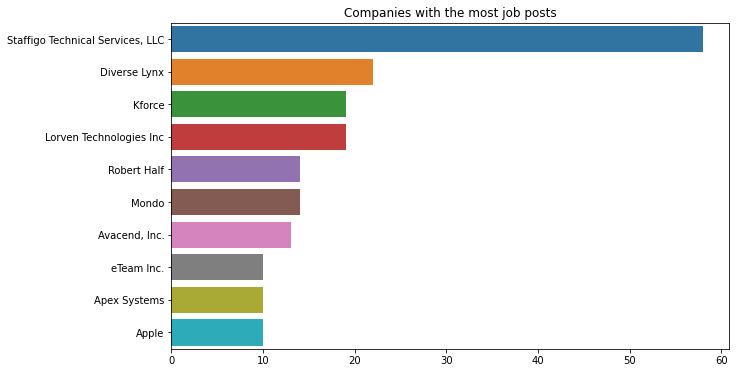

In [28]:
# [::-1] at the end reverses the order
plt.figure(figsize=(10, 6))
sns.barplot(x=ten_companies.values, y=ten_companies.index)
plt.title('Companies with the most job posts')
plt.show()

#### Rating

In [29]:
from collections import OrderedDict

rating_list = []
for rating in analyst['Rating']:
    if rating < 1:
        rating_list.append('less than 1')
    elif 1 <= rating and rating < 2:
        rating_list.append('1 ~ 1.9')
    elif 2 <= rating and rating < 3:
        rating_list.append('2 ~ 2.9')
    elif 3 <= rating and rating < 4:
        rating_list.append('3 ~ 3.9')
    elif 4 <= rating and rating < 5:
        rating_list.append('4 ~ 4.9')
    else:
        rating_list.append('5')
rating_list = pd.Series(rating_list)
rating_range = rating_list.value_counts()
print(rating_range)

rating_dict = dict()
for i in range(len(rating_range)):
    rating_dict[rating_range.index[i]] = rating_range.values[i]
ordered_rating = OrderedDict(sorted(rating_dict.items(), key=lambda t: t[0]))
print()
print(f'Sorted dictionary of ratings and occurrences: \n{ordered_rating}')

3 ~ 3.9    1088
4 ~ 4.9     558
5           402
2 ~ 2.9     186
1 ~ 1.9      18
dtype: int64

Sorted dictionary of ratings and occurrences: 
OrderedDict([('1 ~ 1.9', 18), ('2 ~ 2.9', 186), ('3 ~ 3.9', 1088), ('4 ~ 4.9', 558), ('5', 402)])


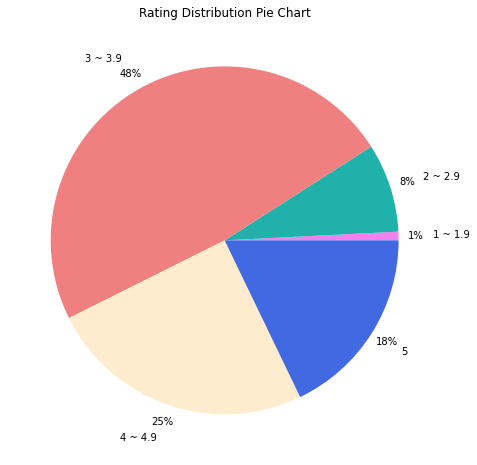

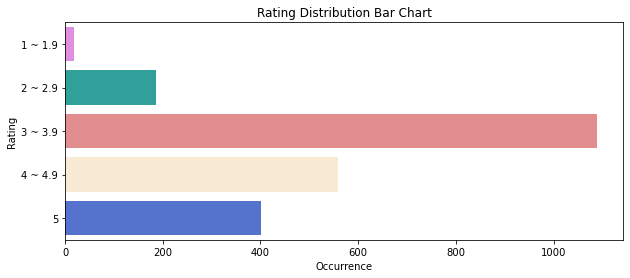

In [30]:
colors = ['violet', 'lightseagreen', 'lightcoral', 'blanchedalmond', 'royalblue']
plt.figure(figsize=(8, 8))
plt.pie(ordered_rating.values(), labels=ordered_rating.keys(),
        autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, colors=colors)
plt.title('Rating Distribution Pie Chart')
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=list(ordered_rating.values()), y=list(ordered_rating.keys()), palette=colors)
plt.ylabel('Rating')
plt.xlabel('Occurrence')
plt.title('Rating Distribution Bar Chart')
plt.show()

In [31]:
analyst['Rating'].describe()

count    1981.000000
mean        3.731903
std         0.670332
min         1.000000
25%         3.300000
50%         3.700000
75%         4.100000
max         5.000000
Name: Rating, dtype: float64

The mean of ratings is 3.73 and 91% lies in the range of 3.0 ~ 5.0, so I guess the majority feels either neutral or positive about their work environment

#### Location

In [32]:
analyst['Location'].value_counts()[:20]

New York, NY         310
Chicago, IL          130
San Francisco, CA    119
Austin, TX            81
Los Angeles, CA       80
Charlotte, NC         78
Houston, TX           72
Dallas, TX            66
San Diego, CA         62
Philadelphia, PA      56
Denver, CO            47
San Antonio, TX       45
San Jose, CA          38
Phoenix, AZ           35
Jersey City, NJ       33
Tempe, AZ             31
Seattle, WA           30
Columbus, OH          29
Irving, TX            29
Plano, TX             28
Name: Location, dtype: int64

Instead of looking at cities, I want to see the jobs' availability by ***states***

In [33]:
state = pd.Series(x.split(', ')[-1] for x in analyst['Location'])
unique_state = state.value_counts()
print(unique_state)

CA    626
TX    394
NY    345
IL    164
PA    114
AZ     97
CO     96
NC     89
NJ     86
WA     54
VA     48
OH     35
UT     33
FL     27
IN     23
DE     11
GA      4
KS      3
SC      3
dtype: int64


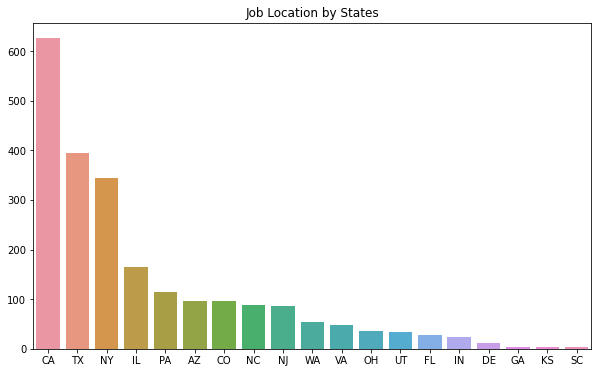

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_state.index, y=unique_state.values)
plt.title('Job Location by States')
plt.show()

I was surprised to see Texas in top 3 as I was expecting only New York and California to be dominant

#### Industry & Sector

In [35]:
analyst['Industry'].unique()

array(['Social Assistance', 'Health Care Services & Hospitals',
       'Internet', 'IT Services', 'Sports & Recreation',
       'Investment Banking & Asset Management', 'Insurance Carriers',
       'Venture Capital & Private Equity', 'Research & Development',
       'Unknown', 'Advertising & Marketing', 'Brokerage Services',
       'Building & Personnel Services', 'Consulting',
       'Casual Restaurants', 'Enterprise Software & Network Solutions',
       'Lending', 'Banks & Credit Unions', 'Computer Hardware & Software',
       'Staffing & Outsourcing',
       'Motion Picture Production & Distribution', 'Legal', 'Real Estate',
       'Federal Agencies', 'TV Broadcast & Cable Networks', 'Accounting',
       'Food & Beverage Stores', 'Health, Beauty, & Fitness',
       'Biotech & Pharmaceuticals', 'Insurance Agencies & Brokerages',
       'Gambling', 'Video Games', 'Colleges & Universities',
       'Architectural & Engineering Services',
       'General Repair & Maintenance', 'Security 

In [36]:
analyst['Sector'].unique()

array(['Non-Profit', 'Health Care', 'Information Technology',
       'Arts, Entertainment & Recreation', 'Finance', 'Insurance',
       'Business Services', 'Unknown',
       'Restaurants, Bars & Food Services', 'Media', 'Accounting & Legal',
       'Real Estate', 'Government', 'Retail', 'Consumer Services',
       'Biotech & Pharmaceuticals', 'Education',
       'Construction, Repair & Maintenance',
       'Oil, Gas, Energy & Utilities', 'Manufacturing',
       'Aerospace & Defense', 'Telecommunications',
       'Transportation & Logistics', 'Mining & Metals',
       'Travel & Tourism'], dtype=object)

A sector is a broader category for industries, so it's more adequate for this analysis as the dataset's size is small

In [37]:
sectors = analyst['Sector'].value_counts()[:15]

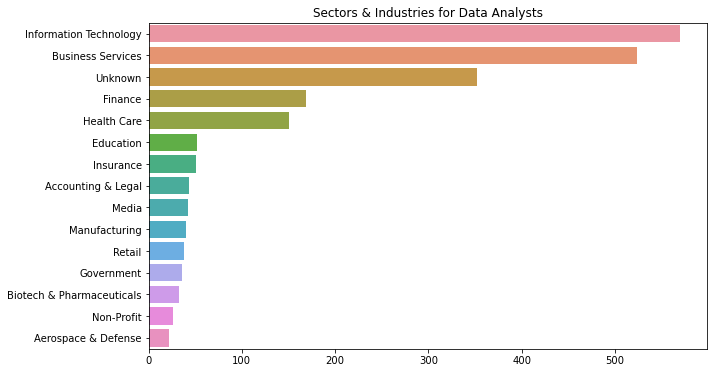

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(y=sectors.index, x=sectors.values)
plt.title('Sectors & Industries for Data Analysts')
plt.show()

As expected, data analysts are hired the most for IT. Also since business analysts and financial analysts are often considered equivalent of data analysts, they're popular in those fields as well. Overall, data analysts are hired in almost every sectors and industries.

#### Revenue & Size

In [39]:
analyst['Revenue USD'].unique()

array(['$100  to  $500 million ', '$2  to  $5 billion ', 'Unknown',
       '$50  to  $100 million ', '$1  to  $2 billion ',
       '$5  to  $10 billion ', '$1  to  $5 million ',
       '$25  to  $50 million ', '$10+ billion ', 'Less than $1 million ',
       '$10  to  $25 million ', '$500 million  to  $1 billion ',
       '$5  to  $10 million '], dtype=object)

In [40]:
revenue = analyst['Revenue USD'].value_counts()
print(revenue)

Unknown                          777
$100  to  $500 million           218
$50  to  $100 million            199
$10+ billion                     189
$10  to  $25 million             132
$2  to  $5 billion               129
$1  to  $5 million               111
$25  to  $50 million             110
Less than $1 million              93
$1  to  $2 billion                87
$500 million  to  $1 billion      79
$5  to  $10 million               72
$5  to  $10 billion               56
Name: Revenue USD, dtype: int64


In [41]:
size_min = analyst['Size Min'].value_counts()
print(size_min)

51      421
1001    348
1       347
201     249
501     211
5001     97
Name: Size Min, dtype: Int64


In [42]:
size_max = analyst['Size Max'].value_counts()
print(size_max)

200      421
5000     348
50       347
500      249
1000     211
10000     97
Name: Size Max, dtype: Int64


#### Salary

In [43]:
print('Average Minimum Salary {}'.format(analyst['Salary Min'].mean())
     )
print('Median Minimum Salary {}'.format(analyst['Salary Min'].median())
     )
print('Average Maximum Salary {}'.format(analyst['Salary Max'].mean())
     )
print('Median Maximum Salary {}'.format(analyst['Salary Max'].median())
     )

Average Minimum Salary 54267.761989342805
Median Minimum Salary 50000.0
Average Maximum Salary 89980.01776198934
Median Maximum Salary 87000.0


It's important to note the difference between median salaries and average (mean) salaries.

Average salaries can be easily skewed by occurrences of high/low values, which means the values don't always correctly represent how much data analysts are paid on average. This is why median is useful; median is the middle number, so it can affectively evade the noise caused by extreme values.

For this analysis, average and median values don't seem to differ by much.
* Average salary: 54267.76 ~ 89980.02 (USD)
* Median Salary: 50000 ~ 87000 (USD)

#### Correlation

In [44]:
from sklearn import preprocessing

# Sector, Location, Salary Min, Salary Max, Rating
temp_df = analyst.copy()[['Location', 'Rating','Salary Min', 'Salary Max', 'Revenue USD', 'Sector']]
temp_df = temp_df.apply(preprocessing.LabelEncoder().fit_transform)
print(temp_df.corr())

             Location    Rating  Salary Min  Salary Max  Revenue USD    Sector
Location     1.000000 -0.006147    0.117457    0.241032    -0.014638 -0.010611
Rating      -0.006147  1.000000    0.029379    0.019753     0.304760  0.485143
Salary Min   0.117457  0.029379    1.000000    0.855985     0.011037 -0.016857
Salary Max   0.241032  0.019753    0.855985    1.000000     0.012499 -0.010026
Revenue USD -0.014638  0.304760    0.011037    0.012499     1.000000  0.305284
Sector      -0.010611  0.485143   -0.016857   -0.010026     0.305284  1.000000


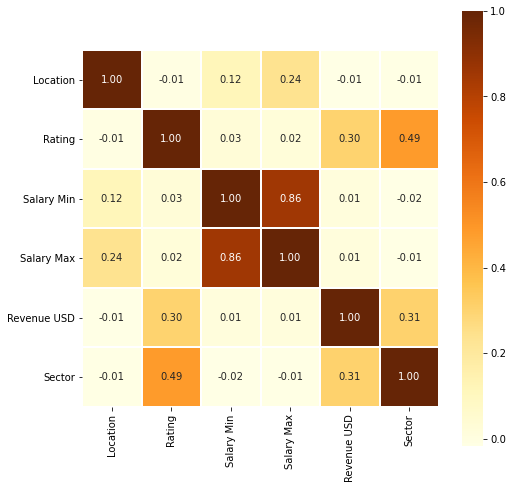

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(data=temp_df.corr(), cmap='YlOrBr', fmt=".2f",
            linewidth=1, square=True, annot=True)
plt.show()

Highest correlation for each column
* Location: Salary Max - 0.24
* Rating <ㅡ> Sector - 0.49
* Salary Min <ㅡ> Salary Max - 0.86
* Revenue: Sector - 0.305, Rating - 0.31